In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [2]:
file='InterpolacionNewtonNoequi.csv'
url='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file

In [3]:
Data = pd.read_csv(Path_,sep=',')
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [4]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

    h = X[1] - X[0]
            
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        for j in range(i, len(X)):
            Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
            
        Sum_ += poly*(Diff[i,i])/(np.math.factorial(i)*(h**(i)))
    
    return Sum_,np.round(Diff,2)

In [5]:
x = np.linspace(np.min(X),np.max(X),100)
y,mat = NewtonGregory(X,Y,x)

In [6]:
mat

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])

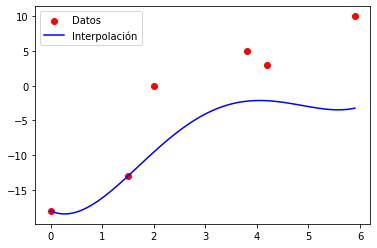

In [7]:
plt.scatter(X,Y,c="r",label="Datos")
plt.plot(x,y,label="Interpolación",color="#0000FF")
plt.legend()

In [8]:
x = sym.Symbol('x',Real='True')
p,_ = NewtonGregory(X,Y,x)
p = p.simplify()

In [9]:
p

-0.00219478737997257*x**5 + 0.165157750342936*x**4 - 1.91458984910837*x**3 + 6.99914403292181*x**2 - 3.40385185185185*x - 18.0

In [10]:
lp = sym.lambdify([x],p,"numpy")

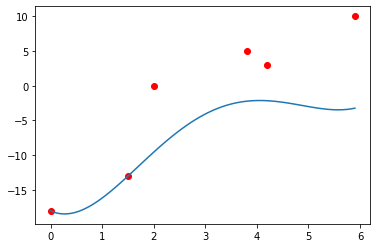

In [11]:
dom = np.linspace(np.min(X),np.max(X),100)
plt.plot(dom,lp(dom))
plt.scatter(X,Y,c="r",label="Datos")
